## Introduction to Dataset
This dataset contains yearly data across 5 categories - electricity generation, capacity, emissions, import and demand data for over 200 geographies from the years 2000 through 2021. 

#### Source:
Data is collected from multi-country datasets (EIA, Eurostat, BP, UN) as well as national sources (e.g China data from the National Bureau of Statistics).
Link to source: https://ember-climate.org/data-catalogue/yearly-electricity-data/

The dataset has 7 numerical columns (integer or float), 8 string columns.

Of these 7 numerical columns, we have 1 Timeline column (Year, which has int values), 4 columns that have 0/1 values and 2 decimal columns.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
electric_data = pd.read_csv("Final.csv")
# electric_data

FileNotFoundError: [Errno 2] No such file or directory: 'Final.csv'

In [ ]:
electric_data.columns
# column info

In [4]:
# Renaming the columns to remove any white spaces
electric_data.rename(

    columns={"Area":"area","Country code":"country_code","Year":"year",
             "Area type":"area_type","Continent":"continent","Ember region":"ember_region",
             "EU":"eu","OECD":"oecd","G20 ":"g20","G7 ":"g7",
             "Category":"category","Subcategory":"subcategory","Variable":"variable",
             "Unit":"unit","Value":"value", "YoY absolute change": "yoy_abs_change"},
    inplace=True)

electric_data.columns

Index(['area', 'country_code', 'year', 'area_type', 'continent',
       'ember_region', 'eu', 'oecd', 'G20', 'G7', 'category', 'subcategory',
       'variable', 'unit', 'value', 'yoy_abs_change'],
      dtype='object')

In [5]:
electric_data.area

0         Afghanistan
1         Afghanistan
2         Afghanistan
3         Afghanistan
4         Afghanistan
             ...     
323525       Zimbabwe
323526       Zimbabwe
323527       Zimbabwe
323528       Zimbabwe
323529       Zimbabwe
Name: area, Length: 323530, dtype: object

In [6]:
# Information regarding the dataset
electric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323530 entries, 0 to 323529
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   area            323530 non-null  object 
 1   country_code    307558 non-null  object 
 2   year            323530 non-null  int64  
 3   area_type       323530 non-null  object 
 4   continent       307558 non-null  object 
 5   ember_region    307558 non-null  object 
 6   eu              307558 non-null  float64
 7   oecd            307558 non-null  float64
 8   G20             307558 non-null  float64
 9   G7              307558 non-null  float64
 10  category        323530 non-null  object 
 11  subcategory     323530 non-null  object 
 12  variable        323530 non-null  object 
 13  unit            323530 non-null  object 
 14  value           302755 non-null  float64
 15  yoy_abs_change  219737 non-null  float64
dtypes: float64(6), int64(1), object(9)
memory usage: 39.5+ M

In [7]:
electric_data.isna().sum()

area                   0
country_code       15972
year                   0
area_type              0
continent          15972
ember_region       15972
eu                 15972
oecd               15972
G20                15972
G7                 15972
category               0
subcategory            0
variable               0
unit                   0
value              20775
yoy_abs_change    103793
dtype: int64

In [8]:
electric_data.isnull().sum()

area                   0
country_code       15972
year                   0
area_type              0
continent          15972
ember_region       15972
eu                 15972
oecd               15972
G20                15972
G7                 15972
category               0
subcategory            0
variable               0
unit                   0
value              20775
yoy_abs_change    103793
dtype: int64

In [9]:
electric_data.isnull().sum().sum()

236372

In [10]:
electric_data.size

5176480

In [11]:
electric_data.shape

(323530, 16)

Percentage of missing values is around 4.5%

In [12]:

electric_data.isnull().sum().sum()/electric_data.size * 100

4.566268970420054

## Cleaning and Handling missing values in the dataset

Cleaning has been split into multiple cell based on the category and subcategories of data.
Explanation has been provided for each cell.

The following code shows that the for the area_type as 'Region', the corresponding country codes would be null as they are not applicable.


In [13]:
count = 0
for el in electric_data['area_type']:
    if el == 'Region':
        count += 1
print(count)

print(electric_data.country_code.isnull().sum())

15972
15972


The country specific columns like 'EU', 'OCED', 'G20' and 'G7' have 2 values (0 or 1) indicationg whether a country is part of these groups or not. For the Area Type as 'Region', the country specific columns have been marked as -1(denoting 'not applicable')

In [14]:
cols = ['eu', 'oecd', 'G20', 'G7'] 

for column in cols:
    electric_data[column].fillna(value='-1', inplace=True)

Country Code represents are 3-letter abbreviations for denoting the countries. For Area Type as 'Regions', these country codes are not applicable, and hence are filled by 'NA'.

Ember Regions are defined in by the source of the dataset: https://ember-climate.org/countries-and-regions/
The value of the ember_region column denotes whether the country is a part of the region or not. For Area Type as Region, this column will also not have a value and therefore is filled as 'NA'



In [15]:
cols = ['country_code','ember_region']

for col in cols:
    electric_data[col].fillna(value='NA', inplace=True)

The values for Continent are filled with the appropriate values wherever possible. Else the values are filled with 'NA' for regions which are not part of a particular continent

In [16]:
areas = ['Asia','Africa','Europe','Oceania','North America']
electric_data['continent'] = electric_data.apply(
    lambda row: row['area'] if row['area_type'] == 'Region' and row['area'] in areas else row['continent'],
    axis=1)

electric_data['continent'] = electric_data.apply(
    lambda row:'Europe' if row['area_type'] == 'Region' and row['area']=='EU' else row['continent'],
    axis=1)


electric_data['continent'] = electric_data.apply(
    lambda row:'NA' if row['area_type'] == 'Region' and not np.all(pd.notnull(row['continent'])) else row['continent'],
    axis=1)


In [17]:
# Electricity import data is only available per country, for all regions, compute year-wise sum for all countries in that resion 

df2 = electric_data.query("area_type == 'Country' and category == 'Electricity imports' and subcategory == 'Electricity imports' and variable == 'Net Imports'")

unstacked = df2.groupby(['year','continent']).agg(agg_imports=('value','sum')).unstack()

agg_imports_grid = unstacked.agg_imports.rename_axis([None], axis=1).reset_index()

yrs = agg_imports_grid['year'].unique().tolist()
continents = ['Africa','Asia','Europe','North America','Oceania','South America']

# enter continent-wise, year-wise sums in the dictionary
mega_dict = dict()

for cnt in continents:
    mega_dict[cnt] = dict()
    for y in yrs:
        mega_dict[cnt][y] = agg_imports_grid.query("year == @y")[cnt].values[0]
        
# Apply the sum values
electric_data['value'] = electric_data.apply(
    lambda row: mega_dict[row['area']][row['year']] if row['category'] == 'Electricity imports' and row['area_type'] == 'Region' and row['area'] in continents 
    and not np.all(pd.notnull(row['value'])) else row['value'],
    axis=1) 


In [18]:
electric_data.isna().sum()

area                   0
country_code           0
year                   0
area_type              0
continent              0
ember_region           0
eu                     0
oecd                   0
G20                    0
G7                     0
category               0
subcategory            0
variable               0
unit                   0
value              20665
yoy_abs_change    103793
dtype: int64

For the first data year (2000), yoy_abs_change is undefined since there is no data for previous year, therefore setting it as 0
SPECIAL CASES - countries established after data start period (Montenegro, South Sudan and Timor-Leste), yoy_abs_change values for their start year will be zero


In [19]:

# for the first data year (2000), yoy_abs_change is undefined since there is no data for previous year, therefore setting it as 0
electric_data['yoy_abs_change'] = electric_data.apply(
    lambda row: 0 if row['year'] == 2000 else row['yoy_abs_change'],
    axis=1)

# SPECIAL CASES - countries established after data start period (Montenegro, South Sudan and Timor-Leste), yoy_abs_change values for their start year will be zero

# Montengro
electric_data['yoy_abs_change'] = electric_data.apply(
    lambda row: 0 if row['country_code'] == 'MNE' and row['year'] == 2005 else row['yoy_abs_change'],
    axis=1)

# South Sudan
electric_data['yoy_abs_change'] = electric_data.apply(
    lambda row: 0 if row['country_code'] == 'SSD' and row['year'] == 2012 else row['yoy_abs_change'],
    axis=1)

# Timor-Leste
electric_data['yoy_abs_change'] = electric_data.apply(
    lambda row: 0 if row['country_code'] == 'TLS' and row['year'] == 2003 else row['yoy_abs_change'],
    axis=1)

Detailed capacity distribution data is missing for all 20 years for multiple countries (approx 19000 rows) - a couple of examples of such data is shown in the below cell

In [20]:
example_missing_countries = ['AFG', 'ZWE']
electric_data.query("category == 'Capacity' and value.isnull() and country_code == @example_missing_countries")

,area,country_code,year,area_type,continent,ember_region,eu,oecd,G20,G7,category,subcategory,variable,unit,value,yoy_abs_change
6,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,Capacity,Fuel,Bioenergy,GW,NaN,0.0
7,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,Capacity,Fuel,Coal,GW,NaN,0.0
8,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,Capacity,Fuel,Gas,GW,NaN,0.0
10,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,Capacity,Fuel,Nuclear,GW,NaN,0.0
12,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,Capacity,Fuel,Other Renewables,GW,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323412,Zimbabwe,ZWE,2020,Country,Africa,Africa,0.0,0.0,0.0,0.0,Capacity,Fuel,Wind,GW,NaN,NaN
323472,Zimbabwe,ZWE,2021,Country,Africa,Africa,0.0,0.0,0.0,0.0,Capacity,Fuel,Gas,GW,NaN,NaN
323474,Zimbabwe,ZWE,2021,Country,Africa,Africa,0.0,0.0,0.0,0.0,Capacity,Fuel,Nuclear,GW,NaN,NaN
323476,Zimbabwe,ZWE,2021,Country,Africa,Africa,0.0,0.0,0.0,0.0,Capacity,Fuel,Other Renewables,GW,NaN,NaN


Since granular data for an entire category (Capacity) is missing for all the years for only these countries, and the missing data is very specific - for e.g. the Capacity of Bioenergy Fuel for generation of eletricity in 2001 for Bahrain, it would be better to fill in these specific missing values with zeroes instead of any aggregate measure like mean so as to avoid introducing any distortions in the data.
Also, since there is no value, the column yoy_abs_change should also be made 0 for such rows.

In [21]:
# make yoy_abs_change and value 0 for rows having blank values in the category 'Capacity'
electric_data['yoy_abs_change'] = electric_data.apply(
    lambda row: 0 if not np.all(pd.notnull(row['value'])) and row['category'] == 'Capacity' else row['yoy_abs_change'],
    axis=1)


electric_data['value'] = electric_data.apply(
    lambda row: 0 if not np.all(pd.notnull(row['value'])) and row['category'] == 'Capacity' else row['value'],
    axis=1)




In [22]:
electric_data.isna().sum()

area                  0
country_code          0
year                  0
area_type             0
continent             0
ember_region          0
eu                    0
oecd                  0
G20                   0
G7                    0
category              0
subcategory           0
variable              0
unit                  0
value              1557
yoy_abs_change    70734
dtype: int64

Similarly, granular factual data points in other categories such Power Sector Emissions, Electricity Generation data from multiple small countries is also missing for the entire data collection period - for e.g., 
1)emissions in Bermuda caused by Gas & other fossil fuels for the year 2005 
2)% of electricity generated in Gibraltar by using Hydro electrictiy in 2001

To avoid any distortions to the data set, such values have also been filled as 0

In [23]:

# power sector emissions data is missing for few countries (around 400 rows), setting value, yoy abs and % change as 0
electric_data['yoy_abs_change'] = electric_data.apply(
    lambda row: 0 if not np.all(pd.notnull(row['value'])) and row['category'] == 'Power sector emissions' else row['yoy_abs_change'],
    axis=1)


electric_data['value'] = electric_data.apply(
    lambda row: 0 if not np.all(pd.notnull(row['value'])) and row['category'] == 'Power sector emissions' else row['value'],
    axis=1)


# if there is no data for electricity generation percentage distribution across fuel types, 
# assign those as 0 as we cannot assign mean or median values to granular percentage distribution data
electric_data['yoy_abs_change'] = electric_data.apply(
    lambda row: 0 if not np.all(pd.notnull(row['value'])) and row['category']=='Electricity generation' 
    and row['unit'] == '%' else row['yoy_abs_change'],
    axis=1)

electric_data['value'] = electric_data.apply(
    lambda row: 0 if not np.all(pd.notnull(row['value'])) and row['category']=='Electricity generation' 
    and row['unit'] == '%' else row['value'],
    axis=1)

electric_data['yoy_abs_change'] = electric_data.apply(
    lambda row: 0 if not np.all(pd.notnull(row['value'])) and row['category']=='Electricity demand' else row['yoy_abs_change'],
    axis=1)

electric_data['value'] = electric_data.apply(
    lambda row: 0 if not np.all(pd.notnull(row['value'])) and row['category']=='Electricity demand' else row['value'],
    axis=1)



In [24]:
electric_data.isna().sum()

area                  0
country_code          0
year                  0
area_type             0
continent             0
ember_region          0
eu                    0
oecd                  0
G20                   0
G7                    0
category              0
subcategory           0
variable              0
unit                  0
value               132
yoy_abs_change    69367
dtype: int64

For percentage data, i.e. when unit column equals %, the column for absoloute change yoy_abs_change is irrelevant since values are in percentages, thus assigning the values for column yoy_abs_change as 0

In [25]:
electric_data['yoy_abs_change'] = electric_data.apply(
    lambda row: 0 if row['unit'] == '%' else row['yoy_abs_change'],
    axis=1)

electric_data['yoy_abs_change'].fillna(0, inplace=True)
electric_data['value'].fillna(0, inplace=True)


In [26]:
electric_data.isna().sum()

area              0
country_code      0
year              0
area_type         0
continent         0
ember_region      0
eu                0
oecd              0
G20               0
G7                0
category          0
subcategory       0
variable          0
unit              0
value             0
yoy_abs_change    0
dtype: int64

## Exporting Cleaned Data and Re-importing the cleaned data into a new dataframe

In [27]:
electric_data.to_csv('cleaned_data_2.csv', encoding='utf-8')

In [28]:
cleaned_df = pd.read_csv("cleaned_data_2.csv", encoding='utf-8')

## Visualizations 

Visualizations have been done using the column - 'value'. Values from other columns such as 'category' and 'subcategoy' have been chosen and each visualizations describes the rows and columns used.

### Bar Graph of Electricity Generation data (Fossil fuels vs Clean fuels) for Asia region

Electricity Generation Data for sub-category Aggregate fuel has been visualized for the continent Asia in a stacked bar graph as shown below: 

Text(0.5, 1.0, 'Electricity generation of Asia from 2000 to 2021')

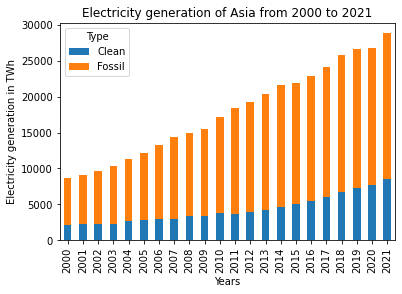

In [30]:
#data for fossil

#applying filters
bargraph_df1 = cleaned_df.query("continent == 'Asia' and category == 'Electricity generation' and subcategory == 'Aggregate fuel' and variable == 'Fossil' and unit == 'TWh'")

years = cleaned_df['year'].unique().tolist()


#sum of values from fossil fuels of each country in Asia per year
yearlyValueForAsia = []
for year in years:
    yearlyValueForAsia.append(bargraph_df1[bargraph_df1.year.isin([year])]['value'].sum())
    


# plt.bar(years, yearlyValueForAsia) 


#creating dataframe
data = [ (years[yearlyValueForAsia.index(x)], 'Fossil', x) for x in yearlyValueForAsia]
df1 = pd.DataFrame(data, columns=['Year', 'Type', 'Value'])

#data for clean

#applying filters
bargraph_df2 = cleaned_df.query("continent == 'Asia' and category == 'Electricity generation' and subcategory == 'Aggregate fuel' and variable == 'Clean' and unit == 'TWh'")

#sum of values from clean fuels of each country in Asia per year
yearlyValueForAsia = []
for year in years:
    yearlyValueForAsia.append(bargraph_df2[bargraph_df2.year.isin([year])]['value'].sum())
    

# plt.bar(years, yearlyValueForAsia) 

#creating dataframe
data = [ (years[yearlyValueForAsia.index(x)], 'Clean', x) for x in yearlyValueForAsia]
df2 = pd.DataFrame(data, columns=['Year', 'Type', 'Value'])

#Creating stacked bar plot 
#concatenating the dataframes
concatDF = pd.concat([df1, df2])
concatDF
pivot = pd.pivot_table(data=concatDF, index=['Year'], columns=['Type'], values='Value')
fig = pivot.plot.bar(stacked=True)
fig.set_xlabel("Years")
fig.set_ylabel("Electricity generation in TWh")
fig.set_title("Electricity generation of Asia from 2000 to 2021")

#### Inference
It can be seen that the electricity generation for both fossil and clean fuel has been on the rise from 2000 to 2021. We can also see that there is an increase in the usage of clean fuel over the years, which means that countries in Asia are slowly switching to clean fuels instead of fossil fuels for electricity genereation, but fossil fuels still remain the dominant choice.

### Pie Chart showing comparsion of Electricity Generated using various sources 

In the below Pie Charts, we have compared detailed breakdowns of Electricity Generation data for for 2 countries - India, which is considered to have a developing economy and USA, which is considered to be a developed economy, for the years 2000 and 2021.
This helps us understand the changes in choice of Fuels used to generated electricity made by those 2 countries over 20 years and also how those 2 countries compared to each other in 2000 and 2021.



In [ ]:
#Creating a data frame with only required Column's
df=electric_data.filter(items=['country_code','year', 'subcategory','variable','unit','value']) 
#Creating a dataframe with required filters
df1=df[(df['country_code'] == 'IND') & (df['year'] == 2000) & (df['subcategory'] =='Fuel') & (df['unit']=='%')] 
#Converting the Column data to List
lst=df1[df1.columns[5]].values.tolist()   
len1=len(lst)
first_half = lst[:len1//2]
lstla=df1[df1.columns[3]].values.tolist() 
len2=len(lstla)
second_half = lstla[:len2//2]  
#Applying Filters for the Piechart
plt.title('Electricity Generated using Fuel by India in 2000',pad=82)
plt.pie(lst ,shadow = True, startangle=180,
        radius = 2, autopct = '%1.1f%%')     
plt.legend(lstla, loc="upper right",bbox_to_anchor=(1.25,1),bbox_transform=plt.gcf().transFigure) 
# showing the plot
plt.show()                                 


df=electric_data.filter(items=['country_code','year', 'subcategory','variable','unit','value']) #Creating a data frame with only required Column's
df1=df[(df['country_code'] == 'IND') & (df['year'] == 2021) & (df['subcategory'] =='Fuel') & (df['unit']=='%')] #Creating a dataframe with required filters
lst=df1[df1.columns[5]].values.tolist() #Converting the Column data to List
len1=len(lst)
first_half = lst[:len1//2]
lstla=df1[df1.columns[3]].values.tolist() 
len2=len(lstla)
second_half = lstla[:len2//2]  
plt.title('Electricity Generated using Fuel by India in 2021',pad=82)
plt.pie(lst ,shadow = True, startangle=180,
        radius = 2, autopct = '%1.1f%%')   #Applying Filters for the Piechart  
plt.legend(lstla, loc="upper right",bbox_to_anchor=(1.25,1),bbox_transform=plt.gcf().transFigure) 
plt.show()  # showing the plot

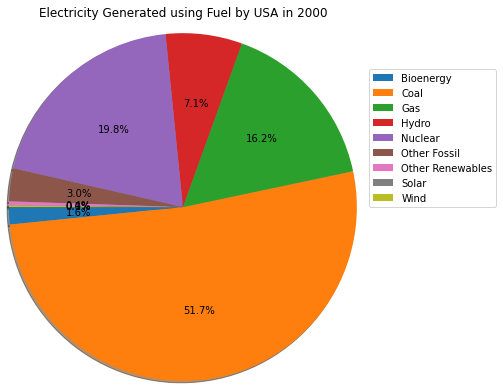

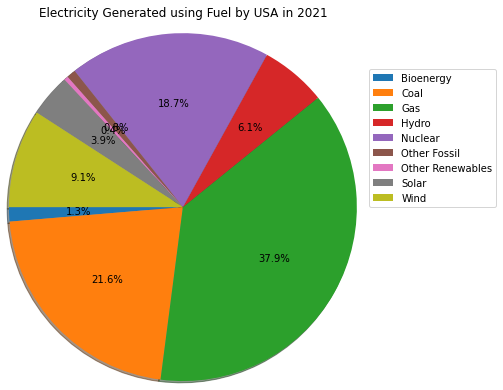

In [32]:
df=electric_data.filter(items=['country_code','year', 'subcategory','variable','unit','value'])  #Creating a data frame with only required Column's
df1=df[(df['country_code'] == 'USA') & (df['year'] == 2000) & (df['subcategory'] =='Fuel') & (df['unit']=='%')]  #Creating a dataframe with required filters
lst=df1[df1.columns[5]].values.tolist() #Converting the Column data to List
len1=len(lst)
first_half = lst[:len1//2]
lstla=df1[df1.columns[3]].values.tolist() 
len2=len(lstla)
second_half = lstla[:len2//2]  
plt.title('Electricity Generated using Fuel by USA in 2000',pad=82)
plt.pie(lst ,shadow = True, startangle=180,
        radius = 2, autopct = '%1.1f%%')   #Applying Filters for the Piechart  
plt.legend(lstla, loc="upper right",bbox_to_anchor=(1.25,1),bbox_transform=plt.gcf().transFigure) 
plt.show()  # showing the plot

df=electric_data.filter(items=['country_code','year', 'subcategory','variable','unit','value'])  #Creating a data frame with only required Column's
df1=df[(df['country_code'] == 'USA') & (df['year'] == 2021) & (df['subcategory'] =='Fuel') & (df['unit']=='%')] #Creating a dataframe with required filters
lst=df1[df1.columns[5]].values.tolist() #Converting the Column data to List
len1=len(lst)
first_half = lst[:len1//2]
lstla=df1[df1.columns[3]].values.tolist() 
len2=len(lstla)
second_half = lstla[:len2//2]  
plt.title('Electricity Generated using Fuel by USA in 2021',pad=82)
plt.pie(lst ,shadow = True, startangle=180,
        radius = 2, autopct = '%1.1f%%')   #Applying Filters for the Piechart  
plt.legend(lstla, loc="upper right",bbox_to_anchor=(1.25,1),bbox_transform=plt.gcf().transFigure) 
plt.show()  # showing the plot

#### Inference

The above pie charts show that the developing country India has been majorly using Coal (likely because of lower cost and easier availbility) to produce electricity followed by Hydro and then Natural Gas both in 2000 and 2021. On the other hand, the developed country USA has transitioned away from Coal towards relatively cleaner Natural Gas to generate its electricity.

### Line Graph for Electricity Demand and Demand per capita across all continents over 20 years

Below line graphs show Electricity Demand and Demand per capita from 2000 to 2021 for all 6 continents - Asia, Africa, North America, Latin America, Oceania and Europe.

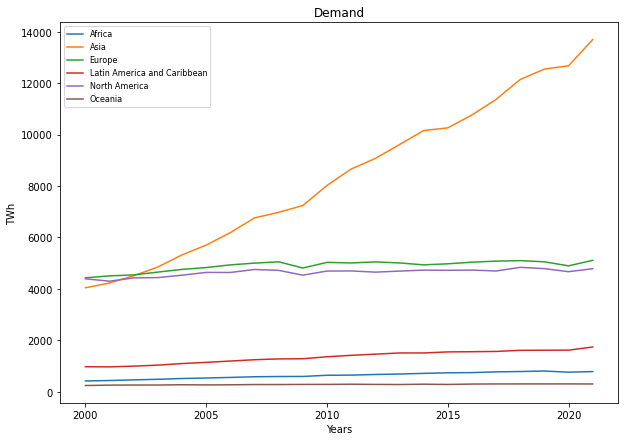

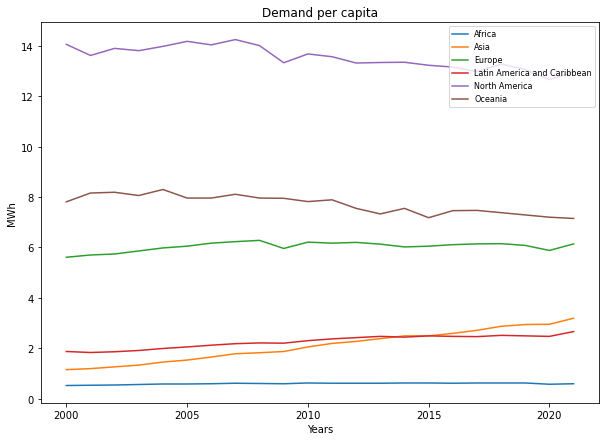

In [33]:
#linegraph-demand
#applying filters for each area
linegraphAfrica_df1 = cleaned_df.query("area == 'Africa' and area_type == 'Region' and category == 'Electricity demand' and subcategory == 'Demand' and unit == 'TWh'")
linegraphAsia_df1 = cleaned_df.query("area == 'Asia' and area_type == 'Region' and category == 'Electricity demand' and subcategory == 'Demand' and unit == 'TWh'")
linegraphEurope_df1 = cleaned_df.query("area == 'Europe' and area_type == 'Region' and category == 'Electricity demand' and subcategory == 'Demand' and unit == 'TWh'")
linegraphLAC_df1 = cleaned_df.query("area == 'Latin America and Caribbean' and area_type == 'Region' and category == 'Electricity demand' and subcategory == 'Demand' and unit == 'TWh'")
linegraphNA_df1 = cleaned_df.query("area == 'North America' and area_type == 'Region' and category == 'Electricity demand' and subcategory == 'Demand' and unit == 'TWh'")
linegraphOceania_df1 = cleaned_df.query("area == 'Oceania' and area_type == 'Region' and category == 'Electricity demand' and subcategory == 'Demand' and unit == 'TWh'")

#plotting linegraph for each area

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

plt.title('Demand')
plt.xlabel('Years')
plt.ylabel('TWh')
plt.plot(years, linegraphAfrica_df1['value'], label = 'Africa')
plt.plot(years, linegraphAsia_df1['value'], label = 'Asia')
plt.plot(years, linegraphEurope_df1['value'], label = 'Europe')
plt.plot(years, linegraphLAC_df1['value'], label = 'Latin America and Caribbean')
plt.plot(years, linegraphNA_df1['value'], label = 'North America')
plt.plot(years, linegraphOceania_df1['value'], label = 'Oceania')
plt.legend(prop={'size': 8})


#linegraph-demand per capita
#applying filters for each area
linegraphAfrica_df2 = cleaned_df.query("area == 'Africa' and area_type == 'Region' and category == 'Electricity demand' and subcategory == 'Demand per capita' and unit == 'MWh'")
linegraphAsia_df2 = cleaned_df.query("area == 'Asia' and area_type == 'Region' and category == 'Electricity demand' and subcategory == 'Demand per capita' and unit == 'MWh'")
linegraphEurope_df2 = cleaned_df.query("area == 'Europe' and area_type == 'Region' and category == 'Electricity demand' and subcategory == 'Demand per capita' and unit == 'MWh'")
linegraphLAC_df2 = cleaned_df.query("area == 'Latin America and Caribbean' and area_type == 'Region' and category == 'Electricity demand' and subcategory == 'Demand per capita' and unit == 'MWh'")
linegraphNA_df2 = cleaned_df.query("area == 'North America' and area_type == 'Region' and category == 'Electricity demand' and subcategory == 'Demand per capita' and unit == 'MWh'")
linegraphOceania_df2 = cleaned_df.query("area == 'Oceania' and area_type == 'Region' and category == 'Electricity demand' and subcategory == 'Demand per capita' and unit == 'MWh'")

#plotting linegraph for each area

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)


plt.title('Demand per capita')
plt.xlabel('Years')
plt.ylabel('MWh')
plt.plot(years, linegraphAfrica_df2['value'], label = 'Africa')
plt.plot(years, linegraphAsia_df2['value'], label = 'Asia')
plt.plot(years, linegraphEurope_df2['value'], label = 'Europe')
plt.plot(years, linegraphLAC_df2['value'], label = 'Latin America and Caribbean')
plt.plot(years, linegraphNA_df2['value'], label = 'North America')
plt.plot(years, linegraphOceania_df2['value'], label = 'Oceania')
plt.legend(prop={'size': 8})


#### Inference

Although the line for Asia in the Demand graph is significantly steeper, the Demand per capita line shows a relatively slower rise for Asia and it is the more developed regions like North America, Europe and Oceania (which has developed countries like Australia and New Zealand) that have the highest Electricity Demand on a per capita basis.

### Scatter Plot showing Total Emissions and Emissions Intensity for the 4 highest GDP countries 

Below 2 scatter plots show Total Emissions from the generation of electricity (in metric tons of CO2) and the Emissions Intensity (in grams of CO2 per kiloWatt-hour of electricity generated) for the 4 countries with the highest GDP in 2022.


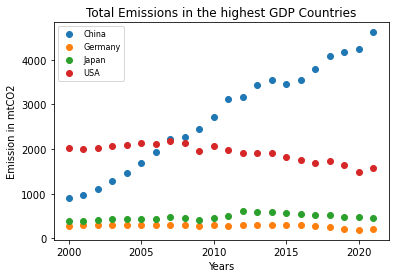

In [34]:
#scatterplot Total

#applying filters for each country
scatterplotchina_df2 = cleaned_df.query("area == 'China' and category == 'Power sector emissions' and subcategory == 'Total' and variable == 'Total emissions' and unit == 'mtCO2'")
scatterplotgermany_df2 = cleaned_df.query("area == 'Germany' and category == 'Power sector emissions' and subcategory == 'Total' and variable == 'Total emissions' and unit == 'mtCO2'")
scatterplotjapan_df2 = cleaned_df.query("area == 'Japan' and category == 'Power sector emissions' and subcategory == 'Total' and variable == 'Total emissions' and unit == 'mtCO2'")
scatterplotusa_df2 = cleaned_df.query("area == 'United States of America' and category == 'Power sector emissions' and subcategory == 'Total' and variable == 'Total emissions' and unit == 'mtCO2'")

#plotting scatterplot for each country
plt.scatter(years, scatterplotchina_df2['value'], marker='o', label = 'China')
plt.scatter(years, scatterplotgermany_df2['value'], marker='o', label = 'Germany')
plt.scatter(years, scatterplotjapan_df2['value'], marker='o', label = 'Japan')
plt.scatter(years, scatterplotusa_df2['value'], marker='o', label = 'USA')
plt.legend(prop={'size': 8})
plt.title('Total Emissions in the highest GDP Countries')
plt.xlabel('Years')
plt.ylabel('Emission in mtCO2')
plt.show()


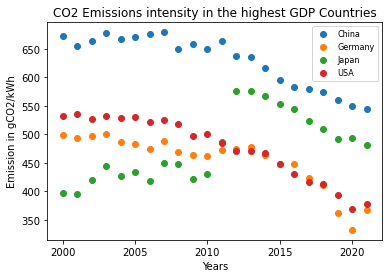

In [35]:
#scatterplot CO2 intensity

#applying filters for each country
scatterplotchina_df1 = cleaned_df.query("area == 'China' and category == 'Power sector emissions' and subcategory == 'CO2 intensity' and variable == 'CO2 intensity' and unit == 'gCO2/kWh'")
scatterplotgermany_df1 = cleaned_df.query("area == 'Germany' and category == 'Power sector emissions' and subcategory == 'CO2 intensity' and variable == 'CO2 intensity' and unit == 'gCO2/kWh'")
scatterplotjapan_df1 = cleaned_df.query("area == 'Japan' and category == 'Power sector emissions' and subcategory == 'CO2 intensity' and variable == 'CO2 intensity' and unit == 'gCO2/kWh'")
scatterplotusa_df1 = cleaned_df.query("area == 'United States of America' and category == 'Power sector emissions' and subcategory == 'CO2 intensity' and variable == 'CO2 intensity' and unit == 'gCO2/kWh'")

#plotting scatterplot for each country
plt.scatter(years, scatterplotchina_df1['value'], marker='o', label = 'China')
plt.scatter(years, scatterplotgermany_df1['value'], marker='o', label = 'Germany')
plt.scatter(years, scatterplotjapan_df1['value'], marker='o', label = 'Japan')
plt.scatter(years, scatterplotusa_df1['value'], marker='o', label = 'USA')
plt.legend(prop={'size': 8})
plt.title('CO2 Emissions intensity in the highest GDP Countries')
plt.xlabel('Years')
plt.ylabel('Emission in gCO2/kWh')
plt.show()


#### Inferences

1. Total Emissions Plot: The total emissions of countries except China is almost stagnant. China is the country with the highest emissions and it is also on the rise, most likely because its economy has seen a great rise in the past 2 decades.
2. Emissions Intensity Plot:  The CO2 emission intensity of the countries is on a decline. Only Japan saw a major increase in 2012, which could be because of the Fukushima nuclear accident. After the accident Japan's nuclear power supply got severly affected which made them consume more coal and natural gas power and thus resulted in an increase in CO2 emissions

### Histogram showing trend of Emissions across all countries for 2000 and 2021

Below histograms show the number of countires grouped as per their Total Emissions in metric tons of CO2 for 2 years 2000 and 2021.
The linear scale histograms clearly show that the data is skewed and thus, to further enhance the visualization, we have plotted the same histograms using logarithmic scale on the X-axis. 

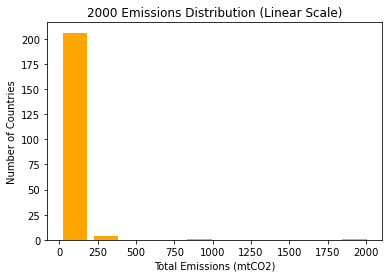

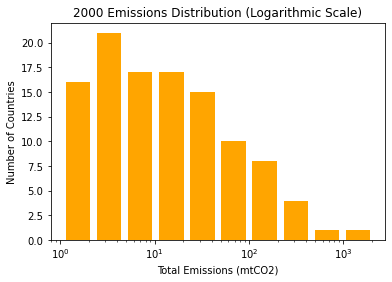

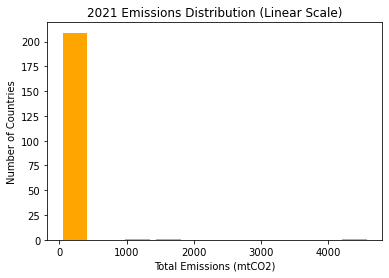

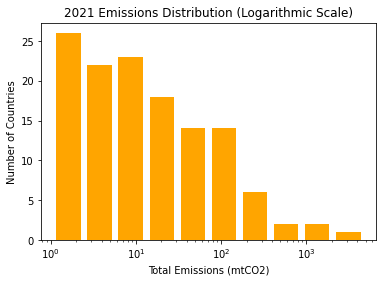

In [36]:
# Histogram cell

def plot_linear_and_log_histograms_for_year(year):
    
    emissions = cleaned_df.query("area_type == 'Country' and year == @year and category == 'Power sector emissions' and subcategory == 'Total' and variable == 'Total emissions'")["value"].tolist()
    # setting the ranges and no. of intervals 
    my_range = (0, round(max(emissions) + 1)) 
    bins = 10

    # plotting a histogram 
    hist, bins, _ = plt.hist(emissions, bins, my_range,color = 'orange', histtype = 'bar', rwidth = 0.8) 

    # x-axis label 
    plt.xlabel('Total Emissions (mtCO2)') 

    # frequency label 
    plt.ylabel('Number of Countries') 

    # plot title 
    plt.title(str(year) + ' Emissions Distribution (Linear Scale)')

    plt.show()

    # histogram on log scale. 
    logbins = np.logspace(0.01,np.log10(bins[-1]),len(bins))

    plt.hist(emissions, logbins,  my_range,color = 'orange', histtype = 'bar', rwidth = 0.8)

    plt.xscale('log')

    # x-axis label 
    plt.xlabel('Total Emissions (mtCO2)') 

    # frequency label 
    plt.ylabel('Number of Countries') 

    # plot title 
    plt.title(str(year) + ' Emissions Distribution (Logarithmic Scale)')

    # function to show the plot 
    plt.show() 


plot_linear_and_log_histograms_for_year(2000)
plot_linear_and_log_histograms_for_year(2021)



#### Inferences

From the linear scale graphs, we can see that the highest emission values have doubled (from around 2000 mtCO2 to above 4000 mtCO2) in 2021 as compared to 2020. Also, the logarithmic graphs show that the number of countries in each emission bucket (1-10, 10-100) have also increased. 
Both these observations clearly indicate that the global emissions in mtCO2 have significantly increased in the past 20 years.  

### Box Plot showing regional emissions distribution as per hemispheres (Northern and Southern)

Below box plots show region-wise emissions data for the 3 major regions in each hemisphere - 
1. Asia, Europe and North America for the Northern Hemisphere
2. Africa, Latin America and Oceanis for the Southern Hemisphere


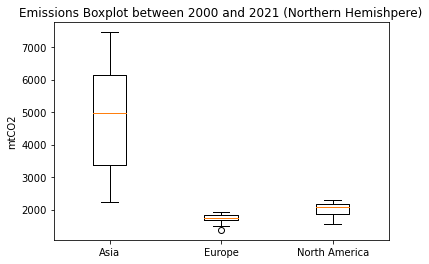

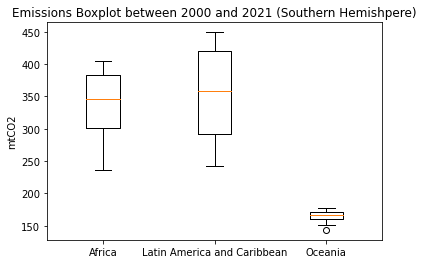

In [37]:
# boxplot cell

northern_hemishpere_regions = ['Asia','Europe','North America']

boxplot_df = cleaned_df.query("area_type == 'Region' and area == @northern_hemishpere_regions and category == 'Power sector emissions' and subcategory == 'Total' and variable == 'Total emissions'")

df = boxplot_df[['area','year','value']]

my_dict=df.groupby('area')['value'].apply(list).to_dict()

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
plt.ylabel('mtCO2')
plt.title('Emissions Boxplot between 2000 and 2021 (Northern Hemishpere)')



southern_hemishpere_regions = ['Africa','Oceania','Latin America and Caribbean']
boxplot_df = cleaned_df.query("area_type == 'Region' and area == @southern_hemishpere_regions and category == 'Power sector emissions' and subcategory == 'Total' and variable == 'Total emissions'")

# print(boxplot_df.shape)

df = boxplot_df[['area','year','value']]

my_dict=df.groupby('area')['value'].apply(list).to_dict()

fig, ax = plt.subplots()
x = ax.boxplot(my_dict.values())

ax.set_xticklabels(my_dict.keys())
plt.ylabel('mtCO2')
plt.title('Emissions Boxplot between 2000 and 2021 (Southern Hemishpere)')

plt.show()



#### Inferences

Median Emissions for the northern hemisphere are significantly larger than those for the southern hemisphere. This makes sense as the northern hemisphere has a significantly higher population than the southern hemisphere, and there are 2 major developing economies in Asia - namely India and China, which have been especially driving the emission numbers up for Asia, thus explaining the highest median emissions in the Northern hemisphere

### Heat Map showing Emissions Intensity (in grams of CO2 per kiloWatt-hour of Electricity generated)

Below heat map shows the emissions intensity in each of the six continents in the world - Asia, Africa, North America, South America, Oceania and Europe plotted for each year between 2000 and 2021.


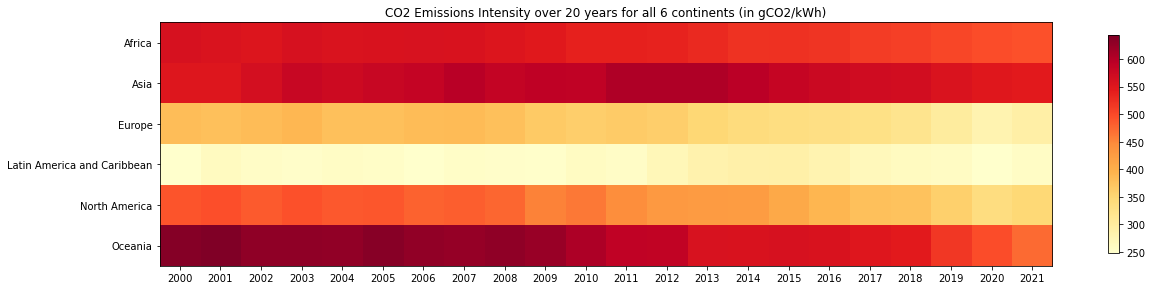

In [38]:
continents = ['Europe','North America','Latin America and Caribbean','Asia','Africa','Oceania']
heatmap_df = cleaned_df.query("area_type == 'Region' and area==@continents and category == 'Power sector emissions' and subcategory == 'CO2 intensity' and variable == 'CO2 intensity'")

df = heatmap_df[['area','year','value']]

my_data=df.groupby('area')['value'].apply(list).tolist()

regions=list(df.groupby('area')['value'].apply(list).to_dict().keys())

years = df['year'].unique().tolist()

arr = np.array(my_data)

fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(arr, cmap="YlOrRd")
cbar = ax.figure.colorbar(im,
                          ax=ax,
                          shrink=0.2 )

# Show all ticks and label them with the respective list entries
ax.set_yticks(np.arange(len(regions)), labels=regions)
ax.set_xticks(np.arange(len(years)), labels=years)


ax.set_title("CO2 Emissions Intensity over 20 years for all 6 continents (in gCO2/kWh)")
plt.show()


#### Inferences

The heatmap shows that for developed regions like Europe, North America and Oceania, there has been a clear decline in emissions intensity from 2000 to 2021, indicating a transition towards cleaner sources of fuel generation. The same trend is also seen for Africa and Latin America, however the values for Africa are still higher than developed regions.
Furthermore, for Asia, we see that the emissions intensity actually was highest in 2013 after which it has seen a decline till 2021, but even then the value for 2021 looks roughly the same as that in 2000.

## Conclusion
As per the above plots, since developing regions such as Asia and Africa show higher emissions than developed regions like North America and Europe and also have greater intensity of CO2 emissions per kWh of electricity consumed. we can conclude that the transition towards using cleaner forms of energy such as Wind, Solar, Hydro and Nuclear in developing regions still has a long way to go, and currently these regions appear to be amongst the bigger drivers of climate change. However, like we saw in the line graphs of Electricity Demand and Demand per Capita, additional data such as Power Emissions per capita for each of the countries could show a different picture as these developing regions have large populations.

## Recommendations

1. Per capita data for Power Sector Emissions (in mtCO2) and CO2 Intensity of Emissions (in gCO2/kWh) for all countries and regions should be added so as to enable a better analysis and comparison of the actual emssions and emission intensity per person for every country.
2. Having GDP information for countries and regions could help determine important metrics such as the ratio of total emissions to GDP which would show the trend of emissions growth vs GDP growth